# Heart Failure Prediction – With Clinical Records 


## 1. Data Exploration

### 1.1 Download and Load the Dataset

In [1]:
#import pandas library
import pandas as pd

#load the dataset
data = pd.read_csv('DIT-May-2024/heart_failure_clinical_records.csv')

### 1.2 Perform Basic Exploratory Data Analysis (EDA)

In [2]:
#display first rows of the dataset
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

In [3]:
#summary of the dataset
print(data.describe())

               age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%          

In [4]:
#information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


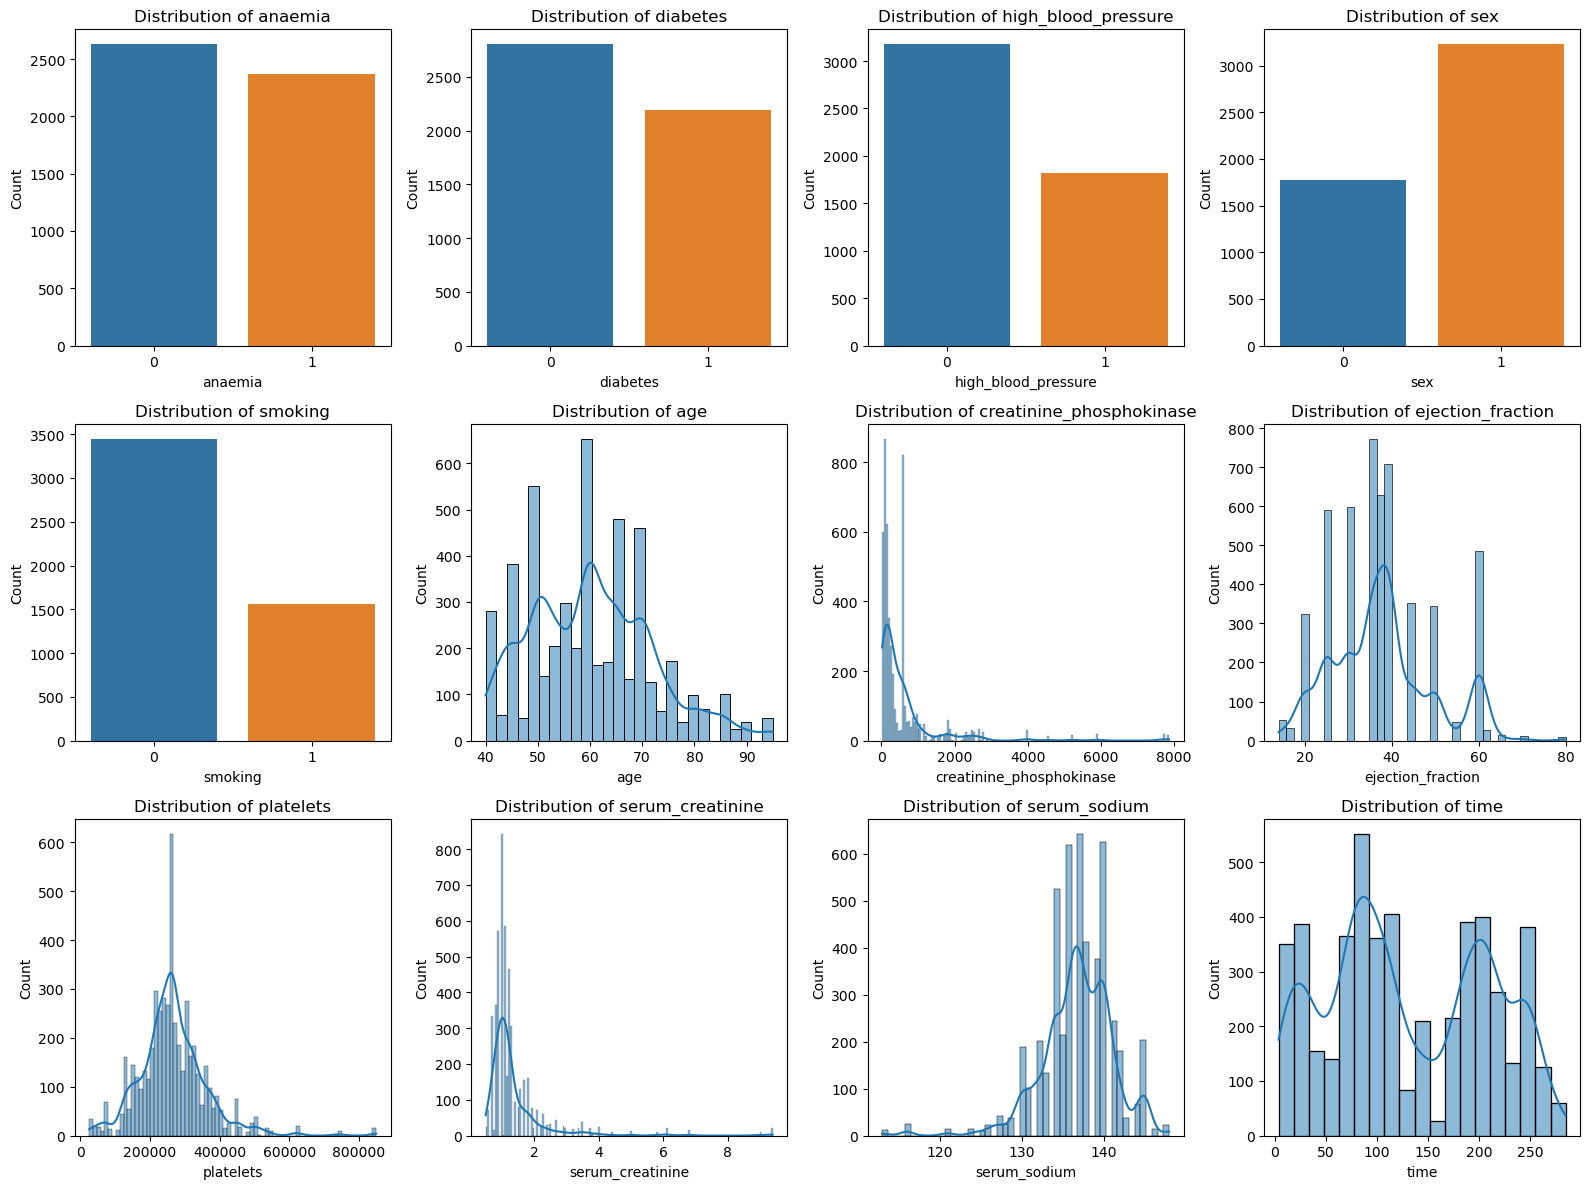

In [5]:
#visualize the distribution of each feature
#identify the qualitative and quantitative features

#import Seaborn and Matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

#set up the matplotlib figure
plt.figure(figsize=(16, 12))

#plot histograms for qualitative features
qualitative_features = [col for col in data.select_dtypes(include=['int64']).columns if data[col].nunique() <= 2]

for i, column in enumerate(qualitative_features, 1):
    if column!="DEATH_EVENT":     #exclude the target variable
        plt.subplot(3, 4, i)
        sns.countplot(x=data[column], data=data)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

#select quantitative features from all numerical features (qualitative+quantitative)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

quantitative_features = list()
for feature in numerical_features:
    if feature not in qualitative_features:
        quantitative_features.append(feature)

#plot histograms for quantitative features
for i, column in enumerate(quantitative_features, len(qualitative_features)):
    if column not in qualitative_features and i<=12:
        plt.subplot(3, 4, i)  #organize multiple plots in a single figure
        sns.histplot(data[column], kde=True)  #plot a histogram for the current column
        plt.title(f'Distribution of {column}')

#display figure with all subplots
plt.tight_layout()
plt.show()

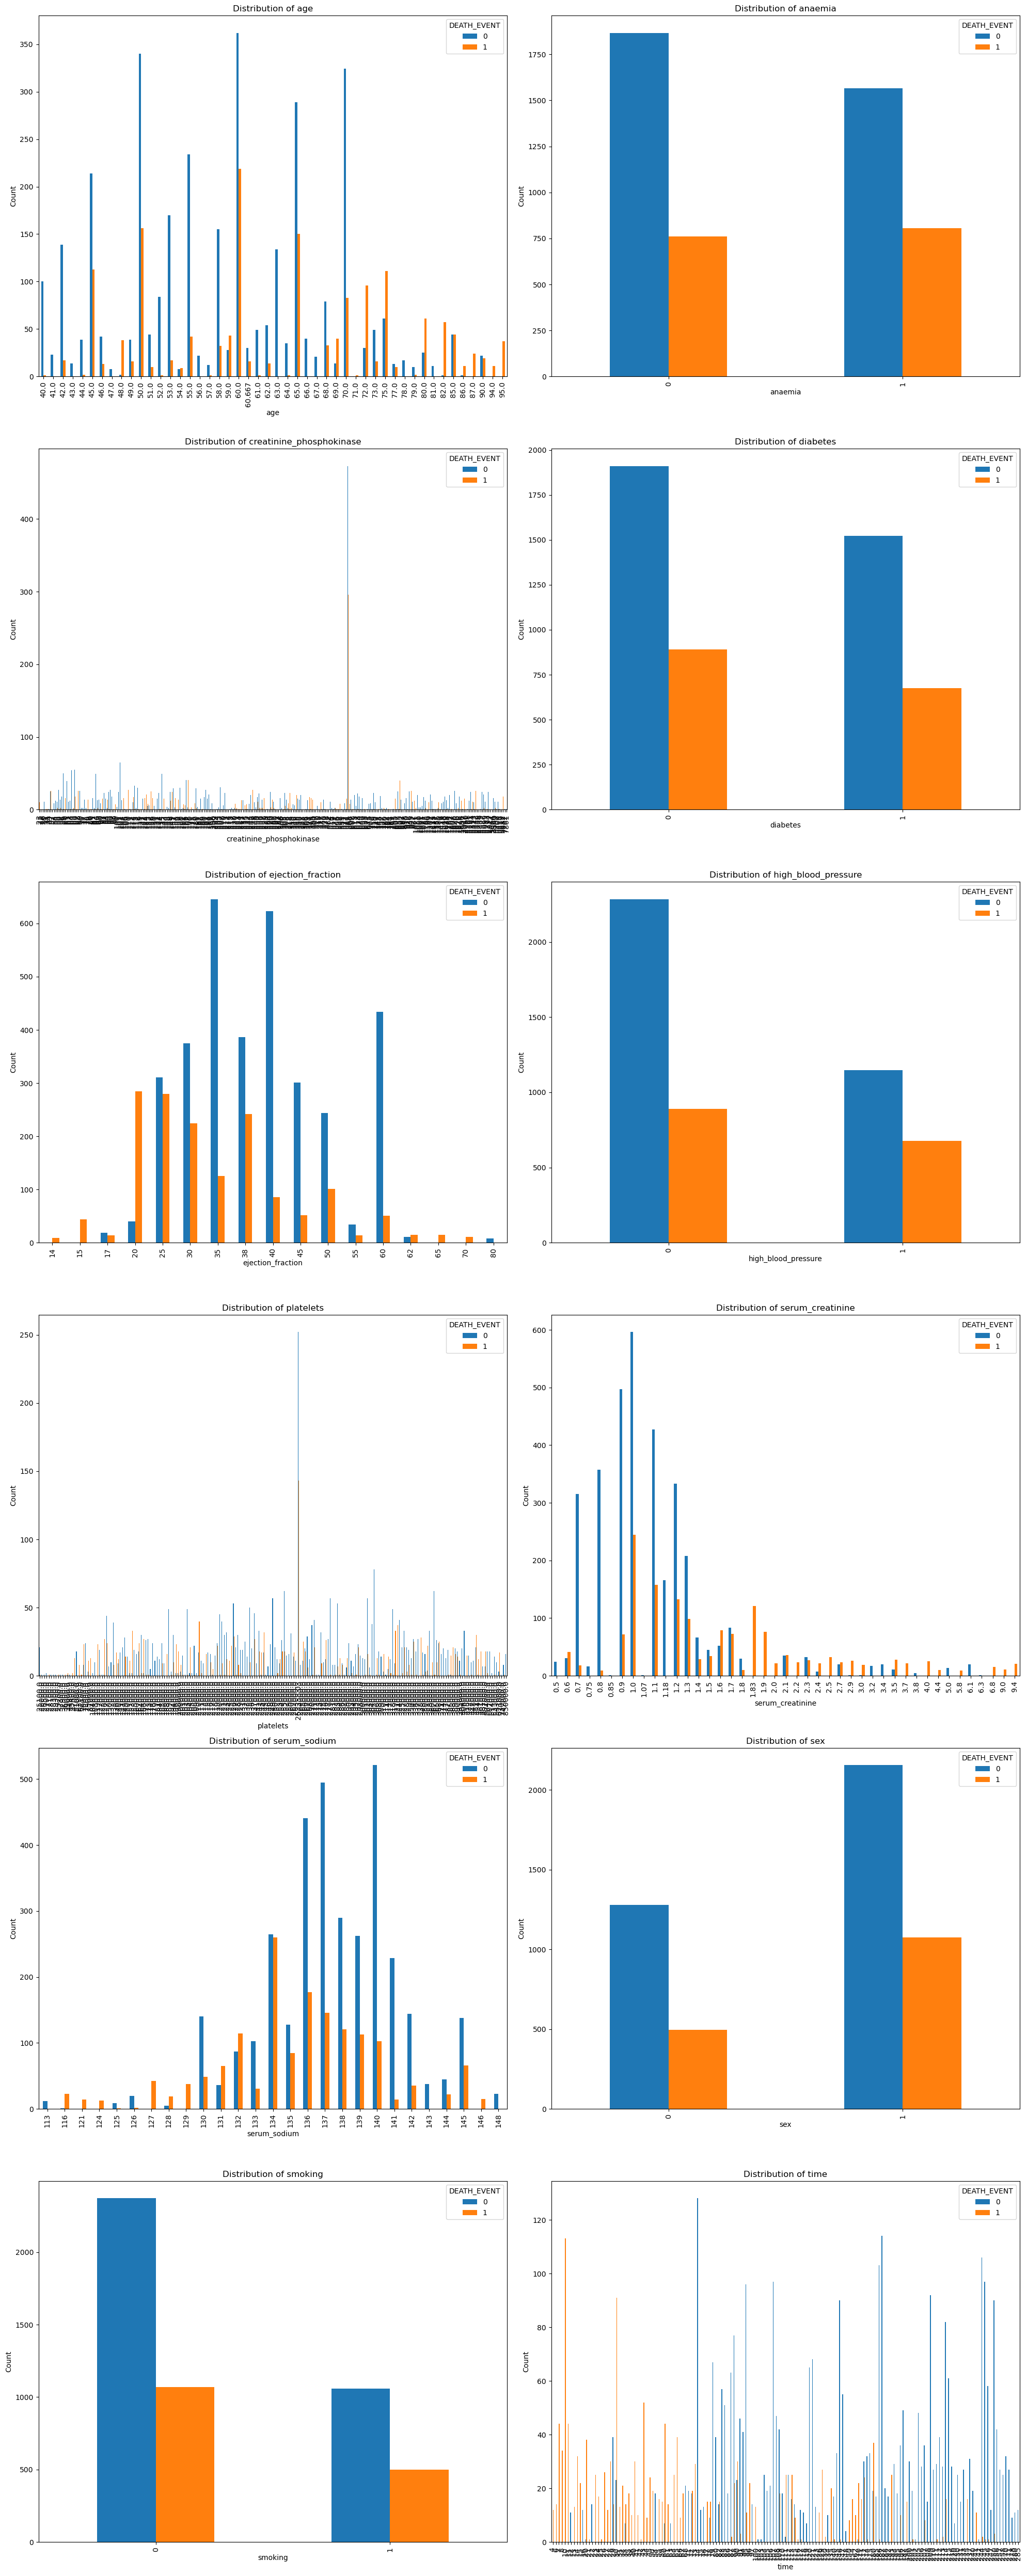

In [6]:
#visualize the distribution of each feature
#identify the features that are strongly related with the target variable

#select quantitative features from all numerical features (qualitative+quantitative)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(6, 2, figsize=(20, 50))  #create figure and axes
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if feature != 'DEATH_EVENT':        #exclude the target variable
        pd.crosstab(data[feature], data.DEATH_EVENT).plot(kind='bar', ax=axes[i])   #create a crosstab plot for each feature aginst target variable
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

#display figure with all subplots
plt.tight_layout()
plt.show()

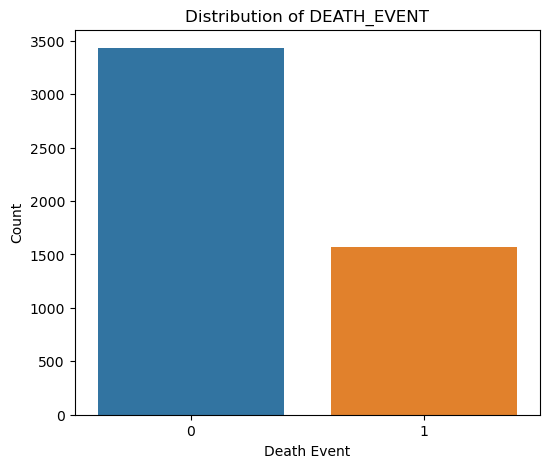

In [7]:
#visualize the distribution for the target variable

plt.figure(figsize=(6, 5))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.show()

## 2. Data Preprocessing

### 2.1 Handle missing values

In [8]:
#check for missing values
missing_values = data.isnull().sum()
print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### 2.2 Encode categorical variables

In [9]:
#list of categorical variables
print(qualitative_features)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


All categorical variables in the dataset are already represented as boolean or binary values. Therefore they do not require further encoding.

### 2.3 Split the dataset into features and the target variable

In [10]:
#separate features and target variable
features_to_drop = ['DEATH_EVENT', 'platelets', 'creatinine_phosphokinase', 'anaemia', 'serum_sodium', 'diabetes', 'smoking']
x = data.drop(features_to_drop, axis=1)  #assign features to x
y = data['DEATH_EVENT']  #assign target variable to y
print(x.columns)

Index(['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'sex', 'time'],
      dtype='object')


### 2.4 Split the dataset into training and testing sets 

In [11]:
#import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

#split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

## 3. Model Building

### 3.1 Choose a classification algorithm

The target variable has only two classes. Therefore this is a binary classification. Therefore choose Logistic Regression as the classification algorithm.

In [12]:
from sklearn.linear_model import LogisticRegression

### 3.2 Train the model on training data

In [13]:
#create an instance of the Logistic Regression model
model = LogisticRegression(max_iter=1000)

#fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 4. Model Evaluation

### 4.1 Evaluate the model's performance on the testing data using appropriate metrics

In [14]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [15]:
# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.86
Precision: 0.8113207547169812
Recall: 0.7633136094674556
F1 Score: 0.7865853658536585


Confusion Matrix:
[[602  60]
 [ 80 258]]


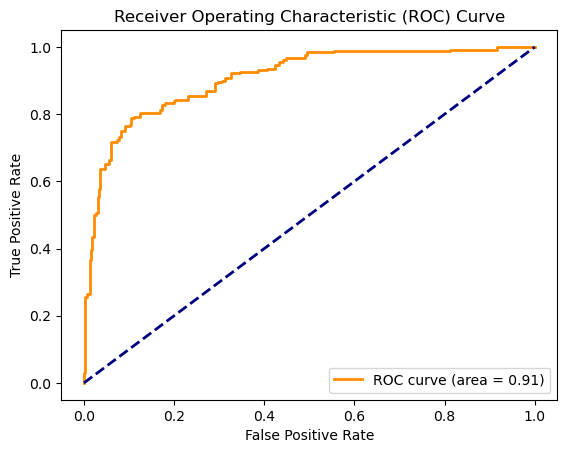

In [16]:
# Import necessary libraries for confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### 4.2  Interpret the model's performance

**Accuracy (0.86):**

The model correctly classifies 86% of the instances. This is a good overall performance metric, indicating that the model is relatively accurate in distinguishing between the classes.

**Precision (0.8113):**

When the model predicts a positive class (DEATH_EVENT = 1), it is correct about 81.13% of the time. This indicates a relatively high reliability in the positive predictions made by the model.

**Recall (0.7633):**

The model correctly identifies 76.33% of the actual positive cases. This means that about 23.67% of the positive cases are missed (false negatives), which is important to note in a medical context where missing positive cases could have serious implications.

**F1 Score (0.7866):**

The F1 score of 0.7866 indicates a good balance between precision and recall. This suggests that the model maintains a reasonable trade-off between not missing too many positive cases and not generating too many false positives.


The model demonstrates strong performance with good accuracy, precision, and a balanced F1 score. However, improving recall remains a key focus to ensure more positive cases are identified, which is critical in healthcare applications. Further tuning and enhancements can help strike an optimal balance between precision and recall, improving the model's utility in practical scenarios.